# パーセプトロン

## パーセプトロンとは
- 「教師あり」学習のアルゴリズム
  - 教師あり学習
    - パーセプトロン
    - ニューラルネットワーク

## ニューラルネットワーク
- 脳の神経細胞(ニューロン）の機能を模した数理モデルのこと
- 1943年にウォーレン・マカロックとウォルターピッツが発表した形式ニューロンが始まりである。

### ニューロンの仕組み
1. 樹状突起で他ニューロンからの情報を受け取る
2. 細胞体の電位が上昇
3. 電位がある閾値を超えるとシナプスからパルス信号を送出(発火)

　　　　　<img src="fig/neuron.png" width="30%">

## パーセプトロンの仕組み

　　　　　<img src="fig/perceptron.png" width="50%">

- y が1以上だとニューロンが発火し1を出力する。
- w1, w2は各入力の重要度を示す*重み*、w0は発火のしやすさを調整する*バイアス*と呼ばれる


## パーセプトロンによるAND演算

- AND演算を行うパーセプトロンを実装してみる。

|入力||出力|
|:--:|:--:|:--:|
|x1|x2|y|
|0|0|0|
|0|1|0|
|1|0|0|
|1|1|1|


- w0 = 0.3 , w1 = 0.5 , w2 = 0.5 とする


In [1]:
# パーセプトロンによるAND演算の例
def and_gate(x1,x2):
    w0,w1,w2 = 0.3,0.5,0.5
    y = w0 + w1*x1 + w2*x2
    
    if y >= 1.0:
        return 1
    else:
        return 0
    
print('and_gate(0,0) = {0}'.format(and_gate(0,0)))
print('and_gate(0,1) = {0}'.format(and_gate(0,1)))
print('and_gate(1,0) = {0}'.format(and_gate(1,0)))
print('and_gate(1,1) = {0}'.format(and_gate(1,1)))


and_gate(0,0) = 0
and_gate(0,1) = 0
and_gate(1,0) = 0
and_gate(1,1) = 1


## パーセプトロンによるOR演算

- OR演算を行うパーセプトロンを実装してみる。

|入力||出力|
|:--:|:--:|:--:|
|x1|x2|y|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|1|


- w0 = 0.7 , w1 = 0.5 , w2 = 0.5 とする

In [2]:
# Sample2
def or_gate(x1,x2):
    w0,w1,w2 = 0.7,0.5,0.5
    y = w0 + w1*x1 + w2*x2
    
    if y >= 1.0:
        return 1
    else:
        return 0
    
print('or_gate(0,0) = {0}'.format(or_gate(0,0)))
print('or_gate(0,1) = {0}'.format(or_gate(0,1)))
print('or_gate(1,0) = {0}'.format(or_gate(1,0)))
print('or_gate(1,1) = {0}'.format(or_gate(1,1)))

or_gate(0,0) = 0
or_gate(0,1) = 1
or_gate(1,0) = 1
or_gate(1,1) = 1


### AND/ORの可視化

<function matplotlib.pyplot.show(close=None, block=None)>

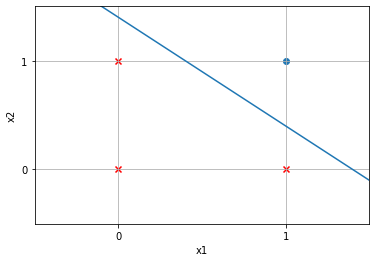

In [3]:
# AND 演算のパーセプトロンの演算結果を可視化するプログラム
#  w0 + w1 * x1 + w2*x2 = 0 となる直線を描画
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

w0,w1,w2 = 0.3,0.5,0.5
plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.yticks([0.0,1.0])
plt.xticks([0.0,1.0])

x1 = np.array([ x/10.0 for x in range(-5,16) ])
x2 = 1.0/w2-(w0/w2 + w1/w2*x1 )

plt.plot(x1,x2)
plt.grid()
plt.scatter([0,0,1],[0,1,0],c='r',marker='x')
plt.scatter([1],[1])
plt.show

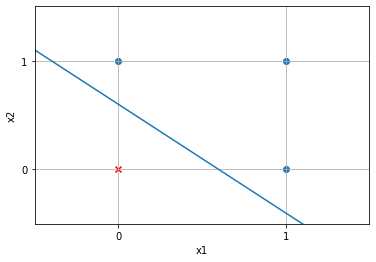

In [4]:
import matplotlib.pyplot as plt
import numpy as np

w0,w1,w2 = 0.7,0.5,0.5
plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.yticks([0.0,1.0])
plt.xticks([0.0,1.0])

x1 = np.array([ x/10.0 for x in range(-5,16) ])
x2 = 1.0/w2-(w0/w2 + w1/w2*x1 )

plt.plot(x1,x2)
plt.grid()
plt.scatter([0],[0],c='r',marker='x')
plt.scatter([0,1,1],[1,0,1])
 
plt.show()

## パーセプトロンでの機械学習

　与えられたデータから、重みを機械学習により見つけ出す。

　　　　<img src="fig/perceptron_graph.png" width="50%">

### パーセプトロンによる学習フロー

　　　　<img src="fig/error.png" width="50%">

### 必要な関数の定義

- 総入力関数
$$
y = w_0 + x_1w_1 + x_2w_2
$$

- 活性化関数
$$
\left\{
    \begin{array}{ll}
    h=1 & (y>=1)\\
    h=0 & (y<1)
    \end{array}
\right.
$$

- 重みの更新
$$
\begin{array}{ll}
w_{new} = w_{old} +(t - h)  \theta x_{(i)} & \\
& \theta は学習率(0〜1)\\
& tは正解ラベル
\end{array}
$$

活性化関数の結果が正解ラベルより大きければ w を減らし、小さければ w を増やし、等しければ変更しない。

### TensorFlow でよく利用する関数

　　　　　<img src="fig/tf_func.png" width="50%">



### 単純パーセプトロン実装

- データ準備

In [87]:
import numpy as np
#活性化関数
def activate(y):
    if ( y >= 1.0):
        return 1.0
    else:
        return 0.0

num_data = 4

#正解の入力データの準備
#1, x1, x2
datas =np.array([ 
        [[1.],[0.], [0.]],
        [[1.],[0.], [1.]],
        [[1.],[1.], [0.]],
        [[1.],[1.], [1.]],
    ],dtype="float32")
#正解ラベル
labels =np.array([0.0, 0.0, 0.0, 1.0], dtype="float32")

- 計算グラフ定義→計算実行

In [104]:
#計算モデルの定義
import tensorflow as tf

# 学習率
rho = tf.constant(0.1, dtype=tf.float32)

# w は 0 で初期化
w = tf.zeros([3,1],dtype=tf.float32)

# 4つの答えがすべて合うまで繰り返す
counter = 0
while counter < num_data:
    data = datas[counter]
    label = labels[counter]
    
    # 総入力関数
    y_i = tf.matmul(w, data, transpose_a=True)
    # 活性化関数
    y_l = activate(y_i)
    # 重みの更新
    w = w + (label - y_l) * rho * data
    # w = tf.add(w, tf.multiply(tf.subtract(label, y_l),tf.multiply(rho, data)))

    print('counter={},W0={},W1={},W2={}'.format(counter,w[0],w[1],w[2]))

    if ( y_l != label ):
        counter = 0
    else:
        counter += 1
                    
print('W0={0},W1={1},W2={2}'.format(w[0],w[1],w[2]))



counter=0,W0=[0.],W1=[0.],W2=[0.]
counter=1,W0=[0.],W1=[0.],W2=[0.]
counter=2,W0=[0.],W1=[0.],W2=[0.]
counter=3,W0=[0.1],W1=[0.1],W2=[0.1]
counter=0,W0=[0.1],W1=[0.1],W2=[0.1]
counter=1,W0=[0.1],W1=[0.1],W2=[0.1]
counter=2,W0=[0.1],W1=[0.1],W2=[0.1]
counter=3,W0=[0.2],W1=[0.2],W2=[0.2]
counter=0,W0=[0.2],W1=[0.2],W2=[0.2]
counter=1,W0=[0.2],W1=[0.2],W2=[0.2]
counter=2,W0=[0.2],W1=[0.2],W2=[0.2]
counter=3,W0=[0.3],W1=[0.3],W2=[0.3]
counter=0,W0=[0.3],W1=[0.3],W2=[0.3]
counter=1,W0=[0.3],W1=[0.3],W2=[0.3]
counter=2,W0=[0.3],W1=[0.3],W2=[0.3]
counter=3,W0=[0.4],W1=[0.4],W2=[0.4]
counter=0,W0=[0.4],W1=[0.4],W2=[0.4]
counter=1,W0=[0.4],W1=[0.4],W2=[0.4]
counter=2,W0=[0.4],W1=[0.4],W2=[0.4]
counter=3,W0=[0.4],W1=[0.4],W2=[0.4]
W0=[0.4],W1=[0.4],W2=[0.4]


- 結果のグラフ化

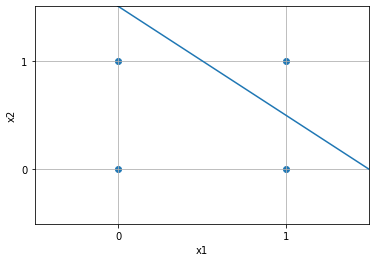

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt


import numpy as np
    
w0,w1,w2 = w[0],w[1],w[2]
plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.yticks([0.0,  1.0])
plt.xticks([0.0,  1.0])

x1 = np.array([ x/10.0 for x in range(-5,45) ])
x2 = 1.0/w2-(w0/w2 + w1/w2*x1 )

plt.plot(x1,x2)

plt.scatter(datas[:,1],datas[:,2])
 

plt.show()


重みはw0=0.4 ,w1=0.4 ,w2=0.4 と収束